In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


def readdipGaN(workdir):
    POS = workdir + "/POSCAR"
    INC = workdir + "/INCAR"
    OUT = workdir + "/OUTCAR"
    POSIN = !head -5 "{POS##*/}" | tail -3
    INCIN = !grep DIPOL "{INC##*/}"
    OUTIN = !grep dipole "{OUT##*/}"

    vecs = np.array([[float(i) for i in j.split()] for j in POSIN])
    Ionic = np.array([float(i) for i in OUTIN[1].split()[4:7]])
    electric= np.array([float(i) for i in OUTIN[2].split()[5:8]])

    TotalDip = Ionic + electric
    TotalDipM = np.array(TotalDip)

    TotalDipM[2] = (TotalDip[2] + vecs[2][2]/2 + 0.01) % vecs[2][2] - vecs[2][2]/2 - 0.01
    TotalDipM[1] = (TotalDip[1] + vecs[1][1]/2) % vecs[1][1] - vecs[1][1]/2
    TotalDipM[0] = (TotalDip[0] - (TotalDip[1] - TotalDipM[1])/vecs[1][1]*vecs[2][1] + vecs[0][0]/2) % vecs[0][0] - vecs[0][0]/2
    return {'Ion':Ionic, 'Electronic':electric, 'Total':TotalDip, 'Mod':TotalDipM}
    
    print(vecs)
    print(DIPOL)
    np.savetxt(sys.stdout, TotalDipM, '%0.5f')

def readdipScN(workdir):
    POS = workdir + "/POSCAR"
    INC = workdir + "/INCAR"
    OUT = workdir + "/OUTCAR"
    POSIN = !head -5 "{POS##*/}" | tail -3
    INCIN = !grep DIPOL "{INC##*/}"
    OUTIN = !grep dipole "{OUT##*/}"

    vecs = np.array([[float(i) for i in j.split()] for j in POSIN])
    Ionic = np.array([float(i) for i in OUTIN[1].split()[4:7]])
    electric= np.array([float(i) for i in OUTIN[3].split()[5:8]])

    TotalDip = Ionic + electric
    TotalDipM = np.array(TotalDip)

    dip = vecs[2][1]
    TotalDipM[2] = (TotalDip[2] + 1 + 0.01) % (dip*2) - 1 - 0.01
    TotalDipM[1] = (TotalDip[1] + 1 + 0.01) % (dip*2) - 1 - 0.01
    TotalDipM[0] = (TotalDip[0] + 1 + 0.01) % (dip*2) - 1 - 0.01
    return {'Ion':Ionic, 'Electronic':electric, 'Total':TotalDip, 'Mod':TotalDipM}
    
    print(vecs)
    print(DIPOL)
    np.savetxt(sys.stdout, TotalDipM, '%0.5f')
    

In [2]:
#path = "/home/nadamski/ScN_figures/Polar_GaNScN/GaN_data/"
path = "/home/nadamski/SP/GaN25_sp/GaN25_sp/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = readdipGaN(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/5.2000529025666484/2.7724226341815377/3.2013335674394536 * 1e20
print(tf)
tf = (tf - 0.01) % 5.2000529025666484 + 0.01 - 5.2000529025666484
P_GaN = -cf*tf

u_wz = 0.5 - x * (0.4995750046824270-0.3770187094116295)/11
u_m_Ga = (0.5 - u_wz) * 2



[ 1.61026659e-06 -3.54558390e-01 -7.08668390e-01 -1.06178839e+00
 -1.41340839e+00 -1.76318839e+00 -2.11048419e+00 -2.45462419e+00
  2.40496871e+00  2.06843871e+00  1.73571710e+00  1.40602710e+00
  1.33398871e+00]


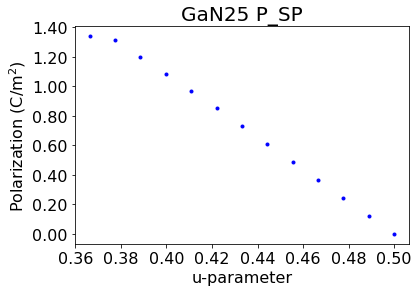

In [3]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)
plt.plot(u_wz,-cf*tf,'b.')

#plt.xlim([0.375, 0.5])
#plt.ylim([0, 1.4])

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


plt.xlabel('u-parameter', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title('GaN25 P_SP', fontsize=20)
plt.savefig('GaN25_sp.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [4]:
path = "/home/nadamski/ScN_figures/Polar_GaNScN/ScN_data/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = readdipScN(lpath)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf

u_m_Sc = 3*x - 1


ValueError: could not convert string to float: 'head:'

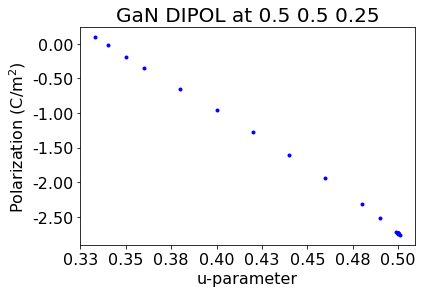

In [131]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)
plt.plot(x,-cf*tf,'b.')

#plt.xlim([0.375, 0.5])
#plt.ylim([0, 1.4])

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


plt.xlabel('u-parameter', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title('GaN DIPOL at 0.5 0.5 0.25', fontsize=20)
plt.savefig('GaN_SuhyunDIPOL.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

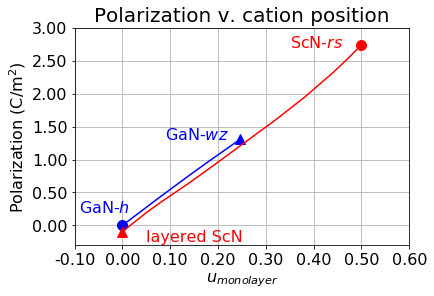

In [198]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)
plt.plot(u_m_Ga, P_GaN,'b')
plt.plot(u_m_Ga[0], P_GaN[0],'b^',markersize=10)
plt.plot(u_m_Ga[-1], P_GaN[-1],'bo',markersize=10)


plt.plot(u_m_Sc, P_ScN,'r')
plt.plot(u_m_Sc[0], P_ScN[0],'r^',markersize=10)
plt.plot(u_m_Sc[-4], P_ScN[-4],'ro',markersize=10)


plt.xlim([-0.1, 0.6])
plt.ylim([-0.3, 3])
plt.grid()

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.text(0.35, 2.70, r'ScN-$rs$', color='r', fontsize=16)
plt.text(0.05, -0.25, r'layered ScN', color='r', fontsize=16)

plt.text(0.09, 1.30, r'GaN-$wz$', color='b', fontsize=16)
plt.text(-0.09, 0.2, r'GaN-$h$', color='b', fontsize=16)



plt.xlabel(r'$u_{monolayer}$', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title('Polarization v. cation position', fontsize=20)
plt.savefig('ScNGaN_polarization.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [20]:
path = "/home/nadamski/remote/cscratch/polar/GaN_suhyun_full/berry_phase_GaN/377"
POS = path + "/POSCAR"

POSIN = !head -5 "{POS##*/}" | tail -3

In [28]:
POSIN[0].split()

['3.2172119663352943', '0.0000000000000000', '0.0000000000000000']

In [31]:
[[float(i) for i in j.split()] for j in POSIN]

[[3.2172119663352943, 0.0, 0.0],
 [-1.6086059831676471, 2.786173522070064, 0.0],
 [0.0, 0.0, 5.243493501333745]]

In [181]:
from scipy.interpolate import interp1d
cub = interp1d(u_m_Sc, P_ScN, kind='cubic')

In [186]:
x = np.linspace(0, 0.5, 1000)

In [187]:
cub(x)

array([-9.66532433e-02, -9.37418741e-02, -9.08280018e-02, -8.79117084e-02,
       -8.49930758e-02, -8.20721860e-02, -7.91491209e-02, -7.62239626e-02,
       -7.32967929e-02, -7.03676939e-02, -6.74367475e-02, -6.45040357e-02,
       -6.15696405e-02, -5.86336438e-02, -5.56961275e-02, -5.27571738e-02,
       -4.98168645e-02, -4.68752815e-02, -4.39325070e-02, -4.09886227e-02,
       -3.80437108e-02, -3.50978531e-02, -3.21511317e-02, -2.92036284e-02,
       -2.62554254e-02, -2.33066045e-02, -2.03572477e-02, -1.74074369e-02,
       -1.44572542e-02, -1.15067815e-02, -8.55610083e-03, -5.60529406e-03,
       -2.65444321e-03,  2.96369757e-04,  3.24706288e-03,  6.19755418e-03,
        9.14776170e-03,  1.20976035e-02,  1.50469975e-02,  1.79958619e-02,
        2.09441146e-02,  2.38916737e-02,  2.68384572e-02,  2.97843831e-02,
        3.27293695e-02,  3.56733344e-02,  3.86161959e-02,  4.15578719e-02,
        4.44982805e-02,  4.74373398e-02,  5.03749677e-02,  5.33110823e-02,
        5.62456017e-02,  

In [191]:
cub(x)[33]

0.00029636975697476054

In [6]:
a8 = [24.68691+1.32064, 5.0082656966862480, 5.4199707562163688, 6.2573625562605475]
a7 = [24.64970+1.89514, 5.0303820436217093, 5.5132963370035331, 6.3755976626100654]
a6 = [24.24301+2.84777, 5.0047792179943400, 5.6229056906795245, 6.4988592568469938]
a5 = [24.37905+3.26830, 5.0516759203417028, 5.6910944939061476, 6.6291277240042001]
a4 = [31.87594-3.54678, 5.0151379723133953, 5.7824555911600948, 6.7913164649016142]
a3 = [19.64542+3.04570, 4.5723200231819412, 6.0589359077676566, 7.0967865102725680]
a2 = [18.44335-2.57077, 4.4817953528515044, 6.2584256762325525, 7.2163398896011142]
a1 = [18.16030-1.40494, 4.4786640852492834, 6.3409100658611903, 7.3496313476596100]
a0 = [17.86869+0.03339, 4.4833031162426442, 6.4379070776774023, 7.4467802387832407]


In [7]:
a8

[26.007550000000002, 5.008265696686248, 5.419970756216369, 6.2573625562605475]

In [8]:
A = np.array([(a8[0]-8*a8[1]) * -16 / (a8[1]*a8[2]*a8[3]),
            (a7[0]-8*a7[1]) * -16 / (a7[1]*a7[2]*a7[3]),
            (a6[0]-8*a6[1]) * -16 / (a6[1]*a6[2]*a6[3]),
            (a5[0]-8*a5[1]) * -16 / (a5[1]*a5[2]*a5[3]),
            (a4[0]-8*a4[1]) * -16 / (a4[1]*a4[2]*a4[3]),
            (a3[0]-6*a3[1]) * -16 / (a3[1]*a3[2]*a3[3]),
            (a2[0]-4*a2[1]) * -16 / (a2[1]*a2[2]*a2[3]),
            (a1[0]-4*a1[1]) * -16 / (a1[1]*a1[2]*a1[3]),
            (a0[0]-4*a0[1]) * -16 / (a0[1]*a0[2]*a0[3])])

In [9]:
(a0[0]-4*a0[1]) * 16 / (a0[1]*a0[2]*a0[3])

-0.0023175128276733616

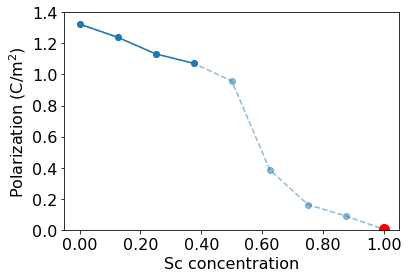

In [28]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

plt.ylim([0, 1.4])

plt.plot(np.linspace(0, 1, 9), A, '--', color='C0', alpha=0.5, marker='o')
plt.plot(np.linspace(0, 0.375, 4), A[0:4], color='C0', marker='o')
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.set_xticklabels(ax.get_xticks(), fontsize=16)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

#plt.title(u'Wurtzite Al$_x$Sc$_{1-x}$N',fontdict={'size':16})


#plt.xlabel(r'Al$_x$Sc$_{8-x}$N$_8$', fontsize=16)
plt.xlabel(r'Sc concentration', fontsize=16)

n = 8
plt.plot(n/8, A[n], color='red', marker='o', markersize=10)
plt.savefig('/home/nadamski/ScN_gif/AlScN/figs/{}.png'.format(n), bbox_inches='tight', format='png', dpi=300)



In [51]:
np.array([-64.45388 + 4.02836, -63.13541 + 0.63239, -61.81695 + -2.73770, \
          -60.49848 + 4.00017 - 2*5.0354590000000004, -59.18022 + 0.70143 - 2*5.0354590000000004, \
          -57.86175 + -2.57406 - 2*5.0354590000000004, -56.54329 + 4.23134 - 4*5.0354590000000004]) - (-64.45388 + 4.02836)

array([  0.      ,  -2.0775  ,  -4.12913 ,  -6.143708,  -8.124188,
       -10.081208, -12.028266])

In [54]:
-12.028266 * 16 /5.0354590000000004/ 5.7824555911600948 / 6.7913164649016142

-0.9732348854385496

In [58]:
np.array([14.63142 + 3.65786, 15.25817 + 2.42514, \
         15.88492 + 1.19385, 16.51167 -0.03467, \
         17.13842 + -1.25918, 17.76517 -2.47861, \
         18.39192+ -3.69211, 19.01867 + 4.24562 - 2*4.5723200231819412]) - (14.63142 + 3.65786)

array([ 0.        , -0.60597   , -1.21051   , -1.81228   , -2.41004   ,
       -3.00272   , -3.58947   , -4.16963005])

In [59]:
4.16963005 * 16 / 4.5723200231819412 / 6.0589359077676566 / 7.0967865102725680

0.33933041458187524

In [104]:
A2 = np.array([(a8[0]) * -16 / (a8[1]*a8[2]*a8[3]),
            (a7[0]) * -16 / (a7[1]*a7[2]*a7[3]),
            (a6[0]) * -16 / (a6[1]*a6[2]*a6[3]),
            (a5[0]) * -16 / (a5[1]*a5[2]*a5[3]),
            (a4[0]) * -16 / (a4[1]*a4[2]*a4[3]),
            (a3[0]) * -16 / (a3[1]*a3[2]*a3[3]),
            (a2[0]) * -16 / (a2[1]*a2[2]*a2[3]),
            (a1[0]) * -16 / (a1[1]*a1[2]*a1[3]),
            (a0[0]) * -16 / (a0[1]*a0[2]*a0[3])])

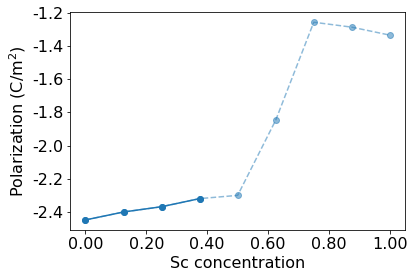

In [107]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

#plt.ylim([0, 1.4])

plt.plot(np.linspace(0, 1, 9), A2, '--', color='C0', alpha=0.5, marker='o')
plt.plot(np.linspace(0, 0.375, 4), A2[0:4], color='C0', marker='o')
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.set_xticklabels(ax.get_xticks(), fontsize=16)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

#plt.title(u'Wurtzite Al$_x$Sc$_{1-x}$N',fontdict={'size':16})


#plt.xlabel(r'Al$_x$Sc$_{8-x}$N$_8$', fontsize=16)
plt.xlabel(r'Sc concentration', fontsize=16)

plt.savefig('AlScN_SP.png', bbox_inches='tight', format='png', dpi=300)



In [214]:
c = 14.588167
A = 90.35011066329744
90.35011066329744 * 14.588167

P =np.array([218.27702 + -14.07375,
             219.64670 + -13.93828, 
             221.01638 + -13.81888,
             222.38605 + -13.73857, 
             223.75573 + -13.72742, 
             229.23443 + -0.10936,
             143.07511 + -5.12899, 
              24.10869 + 14.58164,
             123.96478 + 6.03687,
              48.76286 + -11.31745, 
              61.08995 + -10.27224,
             141.83571 + -1.70773,
             154.16279 + 12.62993]) 

Nc = np.array([-14, -14, -14, -14, -14, -15, -8.666, -1, -6.5, 0.5, .333, -3.5, -4.5])
x = [0, 1/9, 2/9, 3/9, 4/9, 8/9, 1, 2, 3, 4, 5, 8, 9]

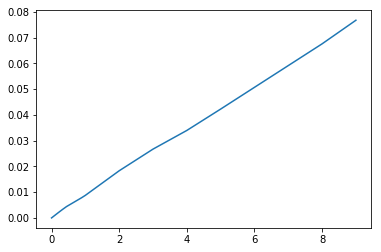

In [215]:
plt.plot(x,(P+c*Nc)/(A*c))

In [ ]:
(219.64670 + -13.93828) - (218.27702 + -14.07375)

In [ ]:
P =np.array([218.27702 + -14.07375,
             219.64670 + -13.93828, 
             221.01638 + -13.81888,
             222.38605 + -13.73857, 
             223.75573 + -13.72742]
x = [0, 1/81, 2/81, 3/81, 4/81]

In [ ]:
plt.plot(P,x)